# Course: Data Analysis

# Topic 4: Principal Component Analysis

In [1]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer, Rotator, calculate_bartlett_sphericity, calculate_kmo

# Example 1

File germany.xlsx contains the results of a survey of German citizens about their attitude towards foreign workers.

Variables description:

    satisfaction - Satisfaction with one's own place in economic relations (yes, no, no answer(9))
    spa - Socio-Political Activities (yes, no, no answer(9))
    position - Position held (worker, officer, specialist, no answer(9))
    gender - Gender (male, female)

The following 15 variables are measured in a Likert scale from 1 to 7, where 1 is strongly disagree and 7 is strongly agree:

    a1    It is necessary to improve the integration of foreigners
    a2    You need to be more patient (tolerant) to refugees
    a3    Country's money should be spent on the country's needs
    a4    Germany - is not a social assistance service for the whole world
    a5    It is necessary to try to establish a good relationship with each other
    a6    The rights of refugees should be limited
    a7    The Germans would become a minority
    a8    The right of refugees to be protected in all of Europe
    a9    Hostility towards foreigners harms the German economy
    a10   First, we need to create normal living conditions for Germans
    a11   We are also foreigners in other countries
    a12   Multiculturalism means multikriminal
    a13   In the boat, there are no free places
    a14   Foreigners out
    a15   The integration of foreigners - the murder of the nation

In [5]:
df1 = pd.read_excel('germany.xlsx', index_col=0)
df1

,satisfaction,spa,position,gender,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
id,,,,,,,,,,,,,,,,,,,
1,9,no,officer,female,6,5,4,2,6,5,2,5,6,2,7,4,3,2,1
2,yes,9,officer,male,6,6,4,3,7,7,2,7,7,4,7,4,1,1,1
3,9,no,officer,male,5,7,7,6,6,6,6,5,5,7,5,4,7,4,1
4,yes,9,officer,female,7,6,3,2,7,7,2,5,2,1,2,1,1,1,1
5,yes,no,officer,female,7,5,5,2,7,2,2,6,7,1,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,9,yes,officer,female,6,6,5,3,6,5,2,6,4,3,4,3,3,1,1
87,yes,no,officer,male,7,7,4,1,7,6,1,7,7,5,7,1,2,1,1
88,9,no,officer,female,6,5,5,5,6,5,4,6,6,5,7,2,4,2,4


## Correlation matrix

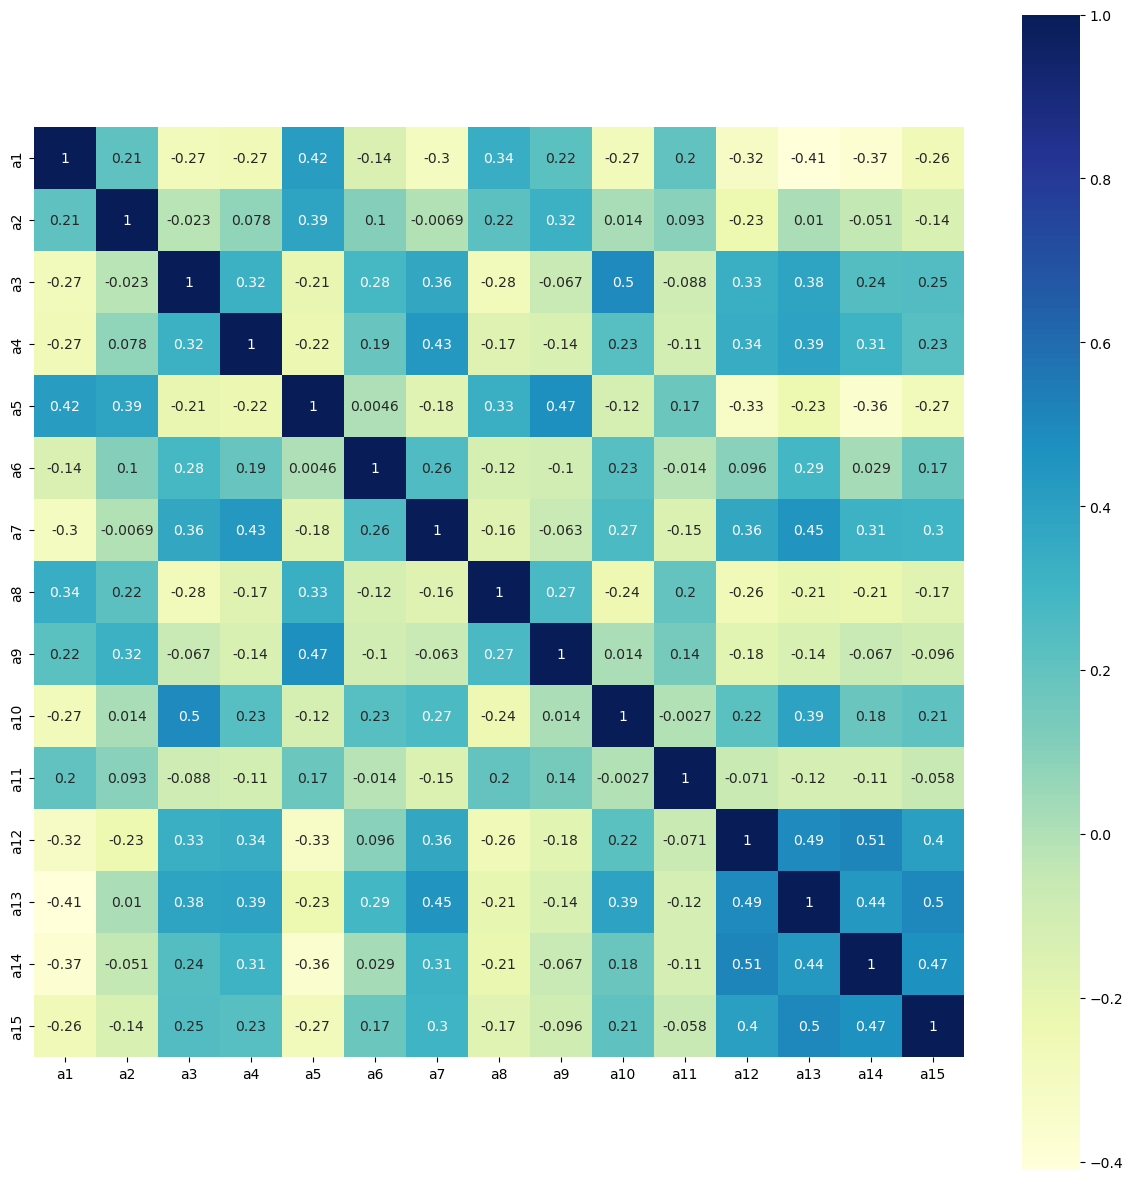

In [6]:
cor = df1.corr('kendall', numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

In [8]:
df1_pca = df1[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15']]
# select only 15 variables for pca

##  Preliminary data assessment

In [9]:
calculate_bartlett_sphericity(df1_pca)  # Bartlett's test of Sphericity

(513.6780436080758, 4.007143691740696e-55)

H0: variables are unrelated (correlation matrix is an identity matrix)

As p-value < 0.05, H0 is rejected, there are statistically significant correlations between the variables.

In [10]:
_, kmo_model = calculate_kmo(df1_pca)
kmo_model  # KMO

0.8004949016333138

KMO=0.8, coefficient has a sufficiently high value, the data are acceptable for PCA

## Defining the number of components

We specify varimax rotation which produces orthogonal components. This means that components are not correlated to each other. This setting is recommended when you want to identify variables to create indexes or new variables without inter-correlated components.

In [11]:
pca1 = FactorAnalyzer(n_factors=15, rotation='varimax', method='principal') 
 # PCA for 15 components, which corresponds to the total number of variables
pca1.fit(df1_pca)

FactorAnalyzer(method='principal', n_factors=15, rotation='varimax',
               rotation_kwargs={})

In [12]:
ev, v = pca1.get_eigenvalues()
ev  # 15 eigenvalues

array([5.14623928, 1.94544498, 1.41494146, 0.99011736, 0.93570522,
       0.76014747, 0.69335223, 0.61249812, 0.52938137, 0.47270815,
       0.43334977, 0.3393038 , 0.301026  , 0.24526248, 0.18052231])

In [15]:
5.14623928 + 1.94544498 + 1.41494146 + 0.99011736 + 0.93570522 + \
0.76014747+ 0.69335223 + 0.61249812 + 0.52938137 + 0.47270815 + \
0.43334977 + 0.3393038 + 0.301026 + 0.24526248 + 0.18052231

14.999999999999996

The sum of all eigenvalues is equal to the total number of variables.

In [16]:
ev[ev > 1]

array([5.14623928, 1.94544498, 1.41494146])

Kaiser criterion suggests to retain those components with eigenvalues equal or higher than 1.

3 eigenvalues are greater than 1, so we will retain 3 components.

## Scree Plot

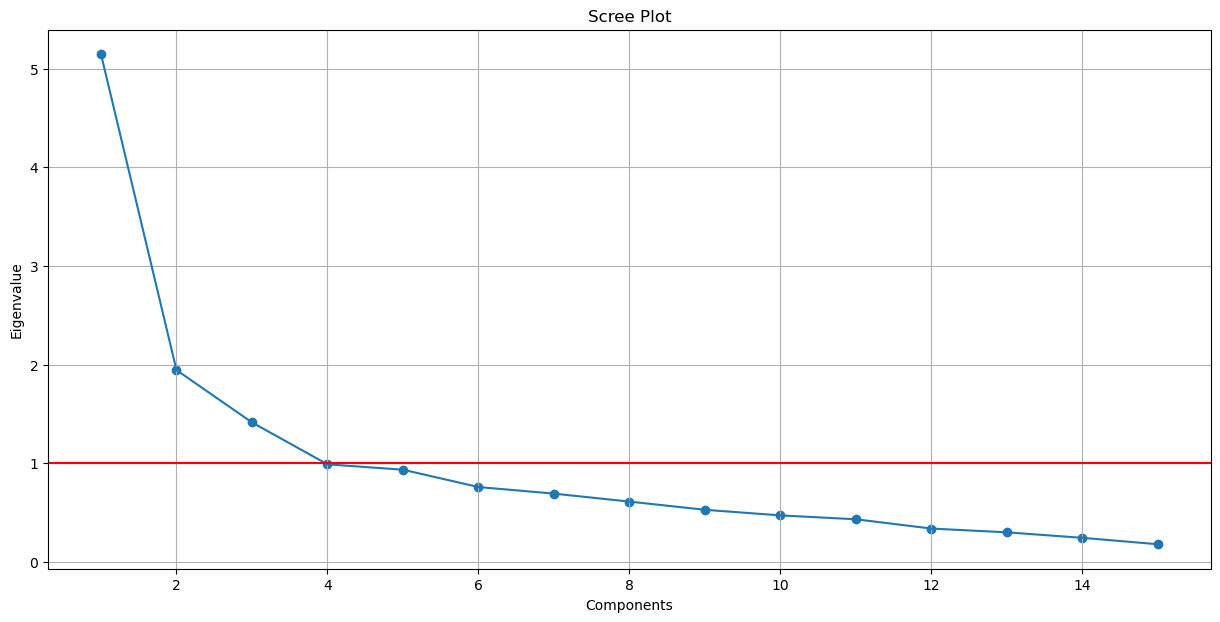

In [17]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df1_pca.shape[1]+1), ev)
plt.plot(range(1, df1_pca.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Final model

In [18]:
pca1 = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal') 
# model with 3 components
pca1.fit(df1_pca)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

## Principal components loading matrix

The higher the load the more relevant is the variable in defining the component’s dimensionality. A negative value indicates an inverse impact on the component. 

In [19]:
pca1.loadings_

array([[-0.46603975,  0.62839388, -0.1905866 ],
       [-0.1407406 ,  0.65734315,  0.21500615],
       [ 0.32693295, -0.15247981,  0.71039752],
       [ 0.53360461, -0.10608248,  0.39339924],
       [-0.36185645,  0.78329619,  0.04517097],
       [-0.01173528, -0.03762977,  0.76310971],
       [ 0.52501094,  0.03584634,  0.54238501],
       [-0.11658203,  0.71944254, -0.26681602],
       [ 0.02565655,  0.55067052, -0.08863275],
       [ 0.252602  , -0.09501621,  0.68519638],
       [ 0.12459922,  0.39203527, -0.29191954],
       [ 0.80157869, -0.19893723,  0.10740725],
       [ 0.68533398, -0.10991915,  0.46507245],
       [ 0.83682772, -0.14402196, -0.02546221],
       [ 0.72505828, -0.04825814,  0.14392791]])

In [20]:
pca1_data = pd.DataFrame(data=pca1.loadings_, 
                       index=df1_pca.columns, 
                       columns=['Component_1', 'Component_2', 'Component_3'])
pca1_data

,Component_1,Component_2,Component_3
a1,-0.466040,0.628394,-0.190587
a2,-0.140741,0.657343,0.215006
a3,0.326933,-0.152480,0.710398
a4,0.533605,-0.106082,0.393399
a5,-0.361856,0.783296,0.045171
a6,-0.011735,-0.037630,0.763110
a7,0.525011,0.035846,0.542385
a8,-0.116582,0.719443,-0.266816
a9,0.025657,0.550671,-0.088633
a10,0.252602,-0.095016,0.685196


In [21]:
pca1_data.index = ["It is necessary to improve the integration of foreigners",
"You need to be more patient (tolerant) to refugees",
"Country's money should be spent on the country's needs",
"Germany - is not a social assistance service for the whole world",
"It is necessary to try to establish a good relationship with each other",
"The rights of refugees should be limited",
"The Germans would become a minority",
"The right of refugees to be protected in all of Europe",
"Hostility towards foreigners harms the German economy",
"First, we need to create normal living conditions for Germans",
"We are also foreigners in other countries",
"Multiculturalism means multikriminal",
"In the boat, there are no free places",
"Foreigners out",
"The integration of foreigners - the murder of the nation"]

In [22]:
pca1_data

,Component_1,Component_2,Component_3
It is necessary to improve the integration of foreigners,-0.466040,0.628394,-0.190587
You need to be more patient (tolerant) to refugees,-0.140741,0.657343,0.215006
Country's money should be spent on the country's needs,0.326933,-0.152480,0.710398
Germany - is not a social assistance service for the whole world,0.533605,-0.106082,0.393399
It is necessary to try to establish a good relationship with each other,-0.361856,0.783296,0.045171
The rights of refugees should be limited,-0.011735,-0.037630,0.763110
The Germans would become a minority,0.525011,0.035846,0.542385
The right of refugees to be protected in all of Europe,-0.116582,0.719443,-0.266816
Hostility towards foreigners harms the German economy,0.025657,0.550671,-0.088633
"First, we need to create normal living conditions for Germans",0.252602,-0.095016,0.685196


In [24]:
pca1_data.sort_values('Component_1', ascending=False)  # sort by the first column

,Component_1,Component_2,Component_3
Foreigners out,0.836828,-0.144022,-0.025462
Multiculturalism means multikriminal,0.801579,-0.198937,0.107407
The integration of foreigners - the murder of the nation,0.725058,-0.048258,0.143928
"In the boat, there are no free places",0.685334,-0.109919,0.465072
Germany - is not a social assistance service for the whole world,0.533605,-0.106082,0.393399
The Germans would become a minority,0.525011,0.035846,0.542385
Country's money should be spent on the country's needs,0.326933,-0.152480,0.710398
"First, we need to create normal living conditions for Germans",0.252602,-0.095016,0.685196
We are also foreigners in other countries,0.124599,0.392035,-0.291920
Hostility towards foreigners harms the German economy,0.025657,0.550671,-0.088633


In [25]:
pca1_data.sort_values('Component_2', ascending=False)  # sort by the second column

,Component_1,Component_2,Component_3
It is necessary to try to establish a good relationship with each other,-0.361856,0.783296,0.045171
The right of refugees to be protected in all of Europe,-0.116582,0.719443,-0.266816
You need to be more patient (tolerant) to refugees,-0.140741,0.657343,0.215006
It is necessary to improve the integration of foreigners,-0.466040,0.628394,-0.190587
Hostility towards foreigners harms the German economy,0.025657,0.550671,-0.088633
We are also foreigners in other countries,0.124599,0.392035,-0.291920
The Germans would become a minority,0.525011,0.035846,0.542385
The rights of refugees should be limited,-0.011735,-0.037630,0.763110
The integration of foreigners - the murder of the nation,0.725058,-0.048258,0.143928
"First, we need to create normal living conditions for Germans",0.252602,-0.095016,0.685196


In [26]:
pca1_data.sort_values('Component_3', ascending=False) #sort by the third column

,Component_1,Component_2,Component_3
The rights of refugees should be limited,-0.011735,-0.037630,0.763110
Country's money should be spent on the country's needs,0.326933,-0.152480,0.710398
"First, we need to create normal living conditions for Germans",0.252602,-0.095016,0.685196
The Germans would become a minority,0.525011,0.035846,0.542385
"In the boat, there are no free places",0.685334,-0.109919,0.465072
Germany - is not a social assistance service for the whole world,0.533605,-0.106082,0.393399
You need to be more patient (tolerant) to refugees,-0.140741,0.657343,0.215006
The integration of foreigners - the murder of the nation,0.725058,-0.048258,0.143928
Multiculturalism means multikriminal,0.801579,-0.198937,0.107407
It is necessary to try to establish a good relationship with each other,-0.361856,0.783296,0.045171


## Description of components
TBC

## Communalities

Communality is the total amount of variance a variable shares with all components (and, therefore, the amount it shares with all other variables in the PCA). It ranges between 0 and 1. Values closer to 1 suggest that extracted components explain more of the variance of an individual variable. The communality is calculated as the sum of the squared component loadings.

In [27]:
pca1.get_communalities()

array([0.64839516, 0.49813558, 0.63479989, 0.45075033, 0.74653343,
       0.58389014, 0.57110295, 0.60237973, 0.31175204, 0.54232993,
       0.25443363, 0.69364074, 0.69805727, 0.72167128, 0.54875361])

In [28]:
communalities1 = pd.DataFrame(data=pca1.get_communalities(), 
                       index=df1_pca.columns, 
                       columns=['Communalities'])
communalities1.sort_values('Communalities') 

,Communalities
a11,0.254434
a9,0.311752
a4,0.450750
a2,0.498136
a10,0.542330
a15,0.548754
a7,0.571103
a6,0.583890
a8,0.602380
a3,0.634800


In [29]:
communalities1[communalities1.Communalities < 0.3]

,Communalities
a11,0.254434


The variable a11 "We are also foreigners in other countries" has low communality value, this variable did not fit well into the model.

## Percentage of variance in the original variables explained by the model

In [30]:
cumulative_variances = pca1.get_factor_variance()[2]
cumulative_variances

array([0.23114119, 0.40020926, 0.56710838])

In [31]:
factor_variance = pd.DataFrame(data=pca1.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=pca1_data.columns)
factor_variance

,Component_1,Component_2,Component_3
Proportional variance,0.231141,0.169068,0.166899
Cumulative variance,0.231141,0.400209,0.567108


PCA with 3 principal components explains 56.7% of the total variance of the original 15 variables. The 1st component explains 23.1%, the second - 16.9%, and the third - 16.7%.

## Saving the components as variables

In [32]:
transformed = pd.DataFrame(data=pca1.transform(df1_pca),
                           index=df1_pca.index,
                           columns=pca1_data.columns)
transformed

,Component_1,Component_2,Component_3
id,,,
1,-0.059275,-0.199022,-1.256665
2,-0.488123,0.733321,-0.323997
3,0.778304,0.161808,1.221614
4,-2.015958,-0.969884,-0.068292
5,-0.624909,0.402465,-1.672938
...,...,...,...
86,-0.847087,-0.507883,-0.251991
87,-1.060538,0.975653,-0.225020
88,0.416453,0.343000,-0.264769


In [33]:
df1 = pd.concat([df1, transformed], axis=1)
df1

,satisfaction,spa,position,gender,a1,a2,a3,a4,a5,a6,...,a9,a10,a11,a12,a13,a14,a15,Component_1,Component_2,Component_3
id,,,,,,,,,,,,,,,,,,,,,
1,9,no,officer,female,6,5,4,2,6,5,...,6,2,7,4,3,2,1,-0.059275,-0.199022,-1.256665
2,yes,9,officer,male,6,6,4,3,7,7,...,7,4,7,4,1,1,1,-0.488123,0.733321,-0.323997
3,9,no,officer,male,5,7,7,6,6,6,...,5,7,5,4,7,4,1,0.778304,0.161808,1.221614
4,yes,9,officer,female,7,6,3,2,7,7,...,2,1,2,1,1,1,1,-2.015958,-0.969884,-0.068292
5,yes,no,officer,female,7,5,5,2,7,2,...,7,1,7,1,1,1,1,-0.624909,0.402465,-1.672938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,9,yes,officer,female,6,6,5,3,6,5,...,4,3,4,3,3,1,1,-0.847087,-0.507883,-0.251991
87,yes,no,officer,male,7,7,4,1,7,6,...,7,5,7,1,2,1,1,-1.060538,0.975653,-0.225020
88,9,no,officer,female,6,5,5,5,6,5,...,6,5,7,2,4,2,4,0.416453,0.343000,-0.264769


# Example 2

File **HR.csv** contains the information about employees of a company. This HR dataset is obtained from the results of a satisfaction survey the company has carried out on their employees in combination with other HR related records. It consists of 14999 rows and 10 columns. Each row is dedicated for a different employee. Below you can find columns and their explanations, respectively.

- satisfaction_level: Satisfaction level
- last_evaluation: Last evaluation score
- number_project: Number of projects worked on (yearly basis)
- average_montly_hours: Average monthly working hours
- time_spend_company: Time spent in the company (in years)
- Work_accident: Whether they have had a work accident in the last 2 years
- promotion_last_5years: Whether they have had a promotion in the last 5 years
- sales: Departments
- salary: Salary
- left: Whether the employee has left

All the data collected is from last 5 years whereas accident data belongs to past 2 years. This HR database does not take into account the employees that have been fired, transferred or hired in the past year.

In [34]:
df2 = pd.read_csv('HR.csv')
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Correlation matrix

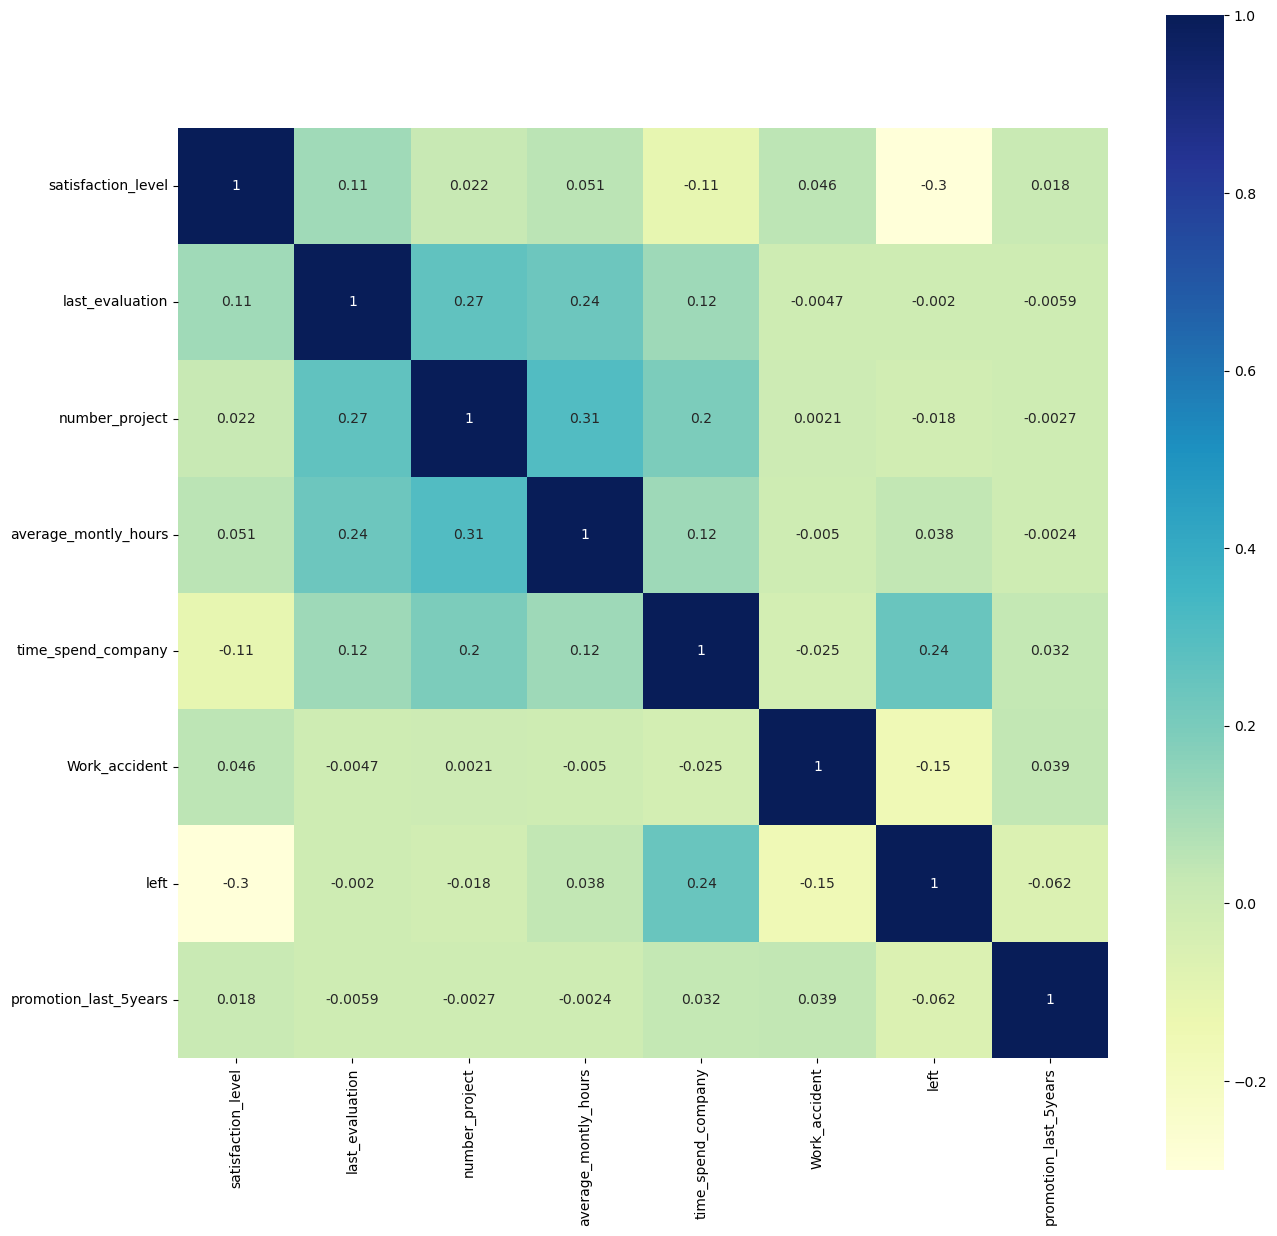

In [35]:
cor = df2.corr('kendall', numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(cor, square = True, cmap='YlGnBu', annot=True)
plt.show()

In [36]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [37]:
df2_pca = df2[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']]
# remove categorical variables

##  Preliminary data assessment

In [38]:
calculate_bartlett_sphericity(df2_pca)  # Bartlett's test of Sphericity

(7324.147005183776, 0.0)

H0: variables are unrelated (correlation matrix is an identity matrix)

As p-value < 0.05, H0 is rejected, there are statistically significant correlations between the variables.

In [39]:
_, kmo_model = calculate_kmo(df2_pca)
kmo_model  # KMO

0.6270063648376472

KMO=0.6, coefficient has an acceptable value

## Determining the number of components

In [40]:
pca2 = FactorAnalyzer(n_factors=7, rotation='varimax', method='principal') 
# PCA for 7 components, which corresponds to the total number of variables
pca2.fit(df2_pca)

FactorAnalyzer(method='principal', n_factors=7, rotation='varimax',
               rotation_kwargs={})

In [41]:
ev, v = pca2.get_eigenvalues()
ev  # 7 eigenvalues

array([1.83005229, 1.12652095, 1.06029067, 0.95592274, 0.84542529,
       0.63359363, 0.54819443])

In [42]:
ev[ev > 1]

array([1.83005229, 1.12652095, 1.06029067])

Kaiser criterion suggests to retain those components with eigenvalues equal or higher than 1.

3 eigenvalues are greater than 1, so we will retain 3 components.

## Scree Plot

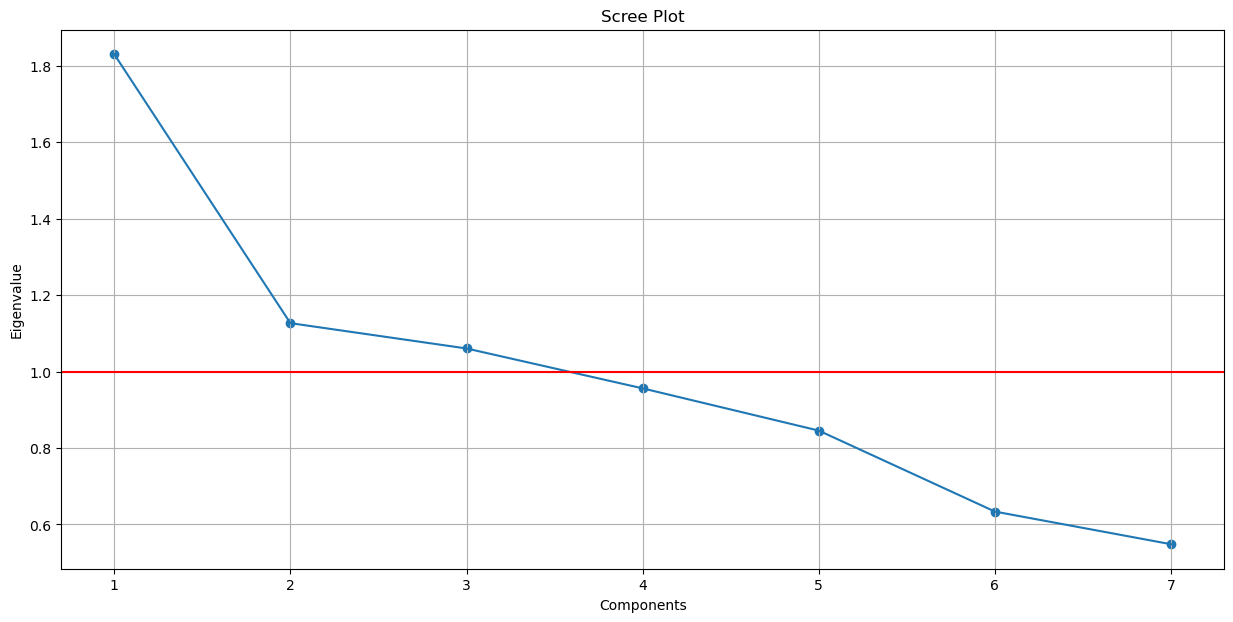

In [43]:
plt.figure(figsize=(15, 7))
plt.scatter(range(1, df2_pca.shape[1]+1), ev)
plt.plot(range(1, df2_pca.shape[1]+1), ev)
plt.axhline(y=1, color='r', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Final model

In [44]:
pca2 = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal') 
# model with 3 components
pca2.fit(df2_pca)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

## Principal components loading matrix

In [45]:
pca2.loadings_

array([[ 0.08642644,  0.83145628,  0.20332582],
       [ 0.75911943,  0.19205902,  0.02310998],
       [ 0.73521367, -0.29055279, -0.02822229],
       [ 0.75642119, -0.05166257, -0.03320605],
       [ 0.28670143, -0.52705086,  0.32058347],
       [ 0.00421947,  0.21334214,  0.57492262],
       [-0.0615235 , -0.1610244 ,  0.7699431 ]])

In [46]:
pca2_data = pd.DataFrame(data=pca2.loadings_, 
                       index=df2_pca.columns, 
                       columns=['Component_1', 'Component_2', 'Component_3'])
pca2_data

,Component_1,Component_2,Component_3
satisfaction_level,0.086426,0.831456,0.203326
last_evaluation,0.759119,0.192059,0.023110
number_project,0.735214,-0.290553,-0.028222
average_montly_hours,0.756421,-0.051663,-0.033206
time_spend_company,0.286701,-0.527051,0.320583
Work_accident,0.004219,0.213342,0.574923
promotion_last_5years,-0.061524,-0.161024,0.769943


In [48]:
pca2_data.sort_values('Component_1', ascending=False)  # sort by the first column

,Component_1,Component_2,Component_3
last_evaluation,0.759119,0.192059,0.023110
average_montly_hours,0.756421,-0.051663,-0.033206
number_project,0.735214,-0.290553,-0.028222
time_spend_company,0.286701,-0.527051,0.320583
satisfaction_level,0.086426,0.831456,0.203326
Work_accident,0.004219,0.213342,0.574923
promotion_last_5years,-0.061524,-0.161024,0.769943


In [49]:
pca2_data.sort_values('Component_2', ascending=False)  # sort by the second column

,Component_1,Component_2,Component_3
satisfaction_level,0.086426,0.831456,0.203326
Work_accident,0.004219,0.213342,0.574923
last_evaluation,0.759119,0.192059,0.023110
average_montly_hours,0.756421,-0.051663,-0.033206
promotion_last_5years,-0.061524,-0.161024,0.769943
number_project,0.735214,-0.290553,-0.028222
time_spend_company,0.286701,-0.527051,0.320583


In [50]:
pca2_data.sort_values('Component_3', ascending=False)  # sort by the third column

,Component_1,Component_2,Component_3
promotion_last_5years,-0.061524,-0.161024,0.769943
Work_accident,0.004219,0.213342,0.574923
time_spend_company,0.286701,-0.527051,0.320583
satisfaction_level,0.086426,0.831456,0.203326
last_evaluation,0.759119,0.192059,0.023110
number_project,0.735214,-0.290553,-0.028222
average_montly_hours,0.756421,-0.051663,-0.033206


## Description of components
TBC

## Communalities

In [51]:
pca2.get_communalities()

array([0.74013047, 0.61368304, 0.62575657, 0.57594469, 0.46275408,
       0.37606869, 0.62252638])

In [52]:
communalities1 = pd.DataFrame(data=pca2.get_communalities(), 
                       index=df2_pca.columns, 
                       columns=['Communalities'])
communalities1.sort_values('Communalities') 

,Communalities
Work_accident,0.376069
time_spend_company,0.462754
average_montly_hours,0.575945
last_evaluation,0.613683
promotion_last_5years,0.622526
number_project,0.625757
satisfaction_level,0.740130


In [53]:
communalities1[communalities1.Communalities < 0.3]

,Communalities


## Percentage of variance in the original variables explained by the model

In [54]:
cumulative_variances = pca2.get_factor_variance()[2]
cumulative_variances

array([0.25463495, 0.42099531, 0.5738377 ])

In [55]:
factor_variance = pd.DataFrame(data=pca2.get_factor_variance()[1:3],
                              index=['Proportional variance', 'Cumulative variance'],
                              columns=pca1_data.columns)
factor_variance

,Component_1,Component_2,Component_3
Proportional variance,0.254635,0.166360,0.152842
Cumulative variance,0.254635,0.420995,0.573838


# Example 3

File SAQ.xlsx contains the results of a survey of American students studying the course "Data Analysis in SPSS".

Variables are measured in a Likert scale from 1 to 5:

- 1 - Strongly Agree
- 2 - Agree 
- 3 - Neither
- 4 - Disagree
- 5 - Strongly Disagree

Variables description:

- q01 - Statistics makes me cry
- q02 - My friends will think I'm stupid for not being able to cope with SPSS
- q03 - Standard deviations excite me
- q04 - I dream that Pearson is attacking me with correlation coefficients
- q05 - I don't understand statistics
- q06 - I have little experience of computers
- q07 - All computers hate me
- q08 - I have never been good at mathematics
- q09 - My friends are better at statistics than me
- q10 - Computers are useful only for playing games
- q11 - I did badly at mathematics at school
- q12 - People try to tell you that SPSS makes statistics easier to understand but it doesn't
- q13 - I worry that I will cause irreparable damage because of my incompetence with computers
- q14 - Computers have minds of their own and deliberately go wrong whenever I use them
- q15 - Computers are out to get me
- q16 - I weep openly at the mention of central tendency
- q17 - I slip into a coma whenever I see an equation
- q18 - SPSS always crashes when I try to use it
- q19 - Everybody looks at me when I use SPSS
- q20 - I can't sleep for thoughts of eigenvectors
- q21 - I wake up under my duvet thinking that I am trapped under a normal distribution
- q22 - My friends are better at SPSS than I am
- q23 - If I'm good at statistics my friends will think I'm a nerd

["Statistics makes me cry",
"My friends will think I'm stupid for not being able to cope with SPSS",
"Standard deviations excite me",
"I dream that Pearson is attacking me with correlation coefficients",
"I don't understand statistics",
"I have little experience of computers",
"All computers hate me",
"I have never been good at mathematics",
"My friends are better at statistics than me",
"Computers are useful only for playing games",
"I did badly at mathematics at school",
"People try to tell you that SPSS makes statistics easier to understand but it doesn't",
"I worry that I will cause irreparable damage because of my incompetence with computers",
"Computers have minds of their own and deliberately go wrong whenever I use them",
"Computers are out to get me",
"I weep openly at the mention of central tendency",
"I slip into a coma whenever I see an equation",
"SPSS always crashes when I try to use it",
"Everybody looks at me when I use SPSS",
"I can't sleep for thoughts of eigenvectors",
"I wake up under my duvet thinking that I am trapped under a normal distribution",
"My friends are better at SPSS than I am",
"If I'm good at statistics my friends will think I'm a nerd"]